In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
plt.rcParams['mathtext.fontset'] = 'stix'  # or other, 'dejavuserif'
plt.rcParams['font.family'] = 'serif'  # or 'DejaVu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']  # 'DejaVu Serif' serif' 'Times'

In [2]:
# Define labels for the metrics to be plotted
metric_labels = {
            "accuracy": "Accuracy",
            "precision": "Precision",
            "recall": "Recall",
            "f1_score": "F1 Score",
            "auc": "AUC"
        }

## 0. Baseline model

In [3]:
# Get the best baseline model
baseline_model = ['202504131715'] # Best model based on Recall
baseline_test_perf = pd.read_csv("../results/metrics/baseline.csv")
baseline_test_perf["version"] = baseline_test_perf["version"].astype(str)
baseline_best = baseline_test_perf[baseline_test_perf["version"].isin(baseline_model)]

## 1. Trade-off of DP-SGD Models

In [4]:
# List of models to be used
# Best models based on Recall
dpsgd_models = [
    "202504152153", # epsilon = 1
    "202504161652", # epsilon = 3
    "202504162125", # epsilon = 5
]

In [5]:
# Read the test performance of the DP-SGD models
dpsgd_test_perf = pd.read_csv("../results/metrics/dpsgd.csv")
dpsgd_test_perf["version"] = dpsgd_test_perf["version"].astype(str)
dpsgd_best = dpsgd_test_perf[dpsgd_test_perf["version"].isin(dpsgd_models)]

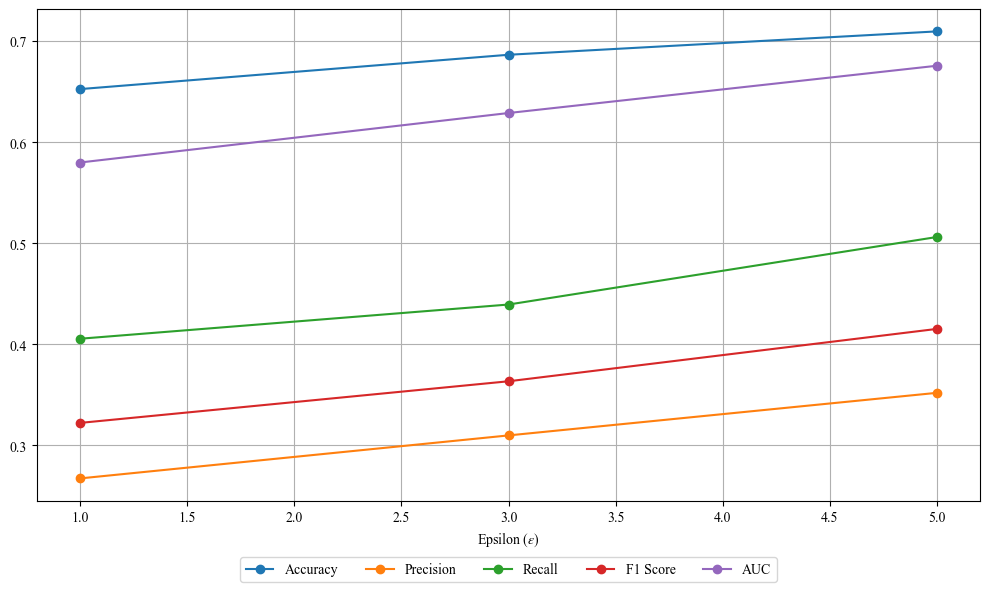

In [8]:
# Plotting
plt.figure(figsize=(10, 6))
for column in ['accuracy', 'precision', 'recall', 'f1_score', 'auc']:
    plt.plot(dpsgd_best['eps'], dpsgd_best[column], marker='o', label=metric_labels[column])

plt.xlabel(r'Epsilon ($\varepsilon$)')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=5)
plt.grid(True)
plt.tight_layout()
plt.show()